<a href="https://colab.research.google.com/github/LamineTourelab/Tutorial/blob/main/tensorflow_API_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_x_train.shape = (60000, 28, 28)
all_x_train[0].shape = (28, 28)
all_x_train[0].dtype = float32
x_train.shape = (55000, 28, 28)
x_train[0].shape = (28, 28)
x_train[0].dtype = float32
0 : Coat
1 : T-shirt/top
2 : Sneaker
3 : Ankle boot
4 : Ankle boot
5 : Ankle boot
6 : Coat
7 : Coat
8 : Dress
9 : Coat


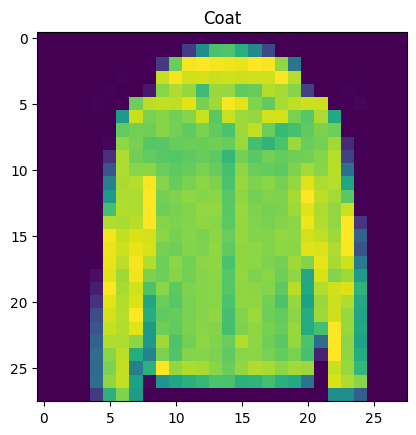

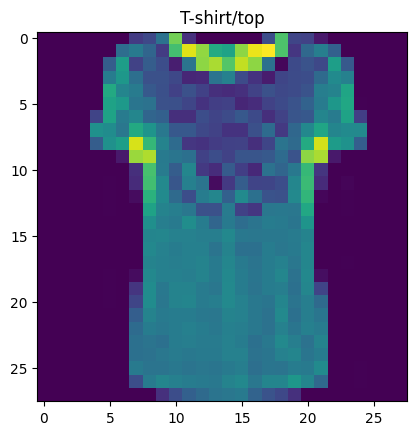

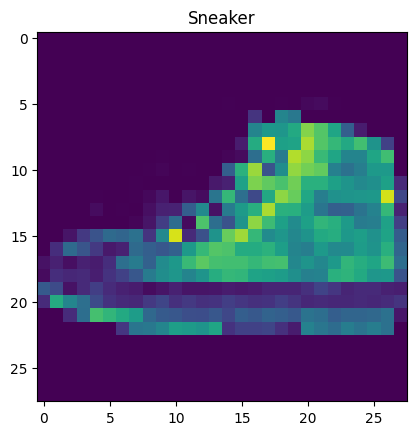

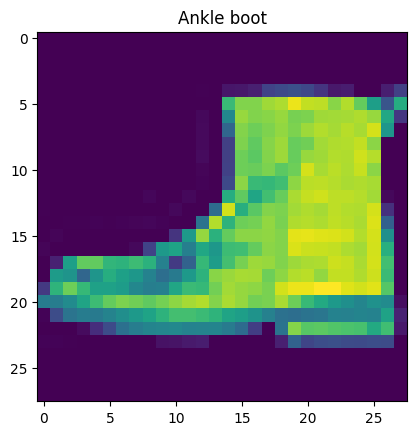

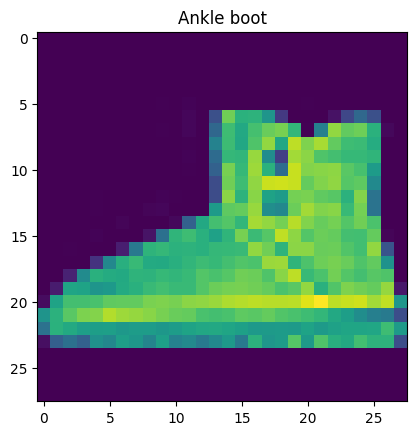

In [2]:
fashion_mnist_data = keras.datasets.fashion_mnist
(all_x_train, all_y_train), (x_test, y_test) = fashion_mnist_data.load_data()

all_x_train = all_x_train.astype('float32')
x_test = x_test.astype('float32')


print(f"all_x_train.shape = {all_x_train.shape}")
print(f"all_x_train[0].shape = {all_x_train[0].shape}")
print(f"all_x_train[0].dtype = {all_x_train[0].dtype}")



x_validation, x_train = all_x_train[:5000] / 255.0, all_x_train[5000:] / 255.0
y_validation, y_train = all_y_train[:5000], all_y_train[5000:]

print(f"x_train.shape = {x_train.shape}")
print(f"x_train[0].shape = {x_train[0].shape}")
print(f"x_train[0].dtype = {x_train[0].dtype}")



fashion_mnist_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


for cls in range(10):
    print(cls, ":",fashion_mnist_class_names[y_train[cls]])


for i in range(5):
    my_img= x_train[i]
    my_img_class = y_train[i]
    my_img_class_name = fashion_mnist_class_names[my_img_class]
    plt.imshow(my_img)
    plt.title(my_img_class_name)
    plt.show()

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()


print(model.layers)
print(model.layers[2].name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 282160 (1.08 MB)
Trainable params: 282160 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[<keras.src.layers.reshaping.flatten.Flatten object at 0x7a4efec1a320>, <keras.src.layers.core.dense.Dense object at 0x7a4efc795690>, <keras.src.layers.

## Compilation

In [4]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training

In [5]:
results = model.fit(x_train, y_train, epochs=10,\
                    validation_data=(x_validation, y_validation))

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7264 - accuracy: 0.7619 - val_loss: 0.5066 - val_accuracy: 0.8276
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4924 - accuracy: 0.8283 - val_loss: 0.4655 - val_accuracy: 0.8408
Epoch 3/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.4453 - accuracy: 0.8443 - val_loss: 0.4157 - val_accuracy: 0.8594
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4173 - accuracy: 0.8536 - val_loss: 0.4018 - val_accuracy: 0.8642
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3964 - accuracy: 0.8609 - val_loss: 0.3930 - val_accuracy: 0.8650
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3798 - accuracy: 0.8657 - val_loss: 0.3848 - val_accuracy: 0.8658
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3658 - accuracy: 0.8706 - val_loss: 0.3583 - val_a

## Results Analysis

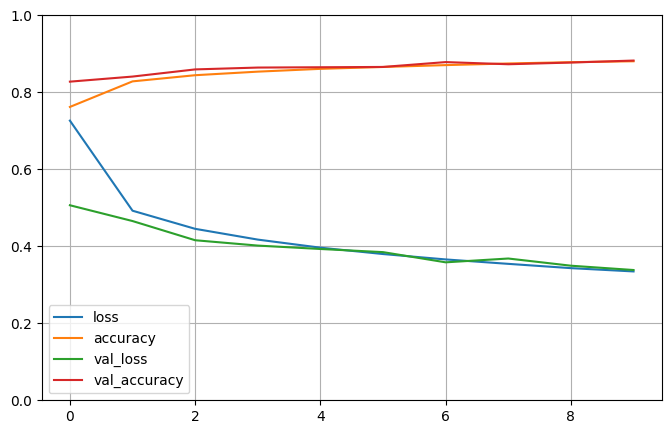

In [7]:
pd.DataFrame(results.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model evaluation

In [8]:
x_test= x_test/255.0
print("Evaluation du modèle :")
model.evaluate(x_test, y_test)

Evaluation du modèle :
313/313 [==============================] - 2s 5ms/step - loss: 0.3756 - accuracy: 0.8681


[0.3756197392940521, 0.8680999875068665]

## Model prediction

In [12]:
x_new = x_test[11:20]
y_prob = model.predict(x_new)
print(f"y_prob = {y_prob.round(2)}")
y_prediction = model.predict(x_new)
print(f"y_prediction = {y_prediction}")



1/1 [==============================] - 0s 26ms/step
y_prob = [[0.   0.   0.   0.   0.   0.94 0.   0.03 0.   0.03]
 [0.   0.   0.   0.01 0.   0.37 0.   0.45 0.17 0.  ]
 [0.   0.01 0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.2  0.   0.75 0.   0.02 0.   0.02 0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.96 0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.78 0.   0.16 0.   0.06 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.95 0.   0.   0.   0.   0.   0.05 0.   0.   0.  ]]
1/1 [==============================] - 0s 26ms/step
y_prediction = [[3.1884041e-04 9.0832909e-06 2.2825778e-04 7.7158285e-05 2.8249460e-05
  9.4131207e-01 4.9991539e-04 2.9197719e-02 3.3048738e-03 2.5023883e-02]
 [2.8612296e-04 2.5517552e-04 5.2534125e-04 1.1631102e-02 5.4271437e-05
  3.6781955e-01 3.3234953e-04 4.5135418e-01 1.6645952e-01 1.2823747e-03]
 [1.8247330e-04 1.0255000e-02 1.5272074e-04 9.8864001e-01 1.5142665e-04
  5.2109713e-06 5.4259861e-05 1.

# Tensorflow functional API

In [15]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
housing = fetch_california_housing()
all_x_train, x_test, all_y_train, y_test = train_test_split(housing.data, housing.target)


x_train, x_validation, y_train, y_validation = train_test_split(all_x_train, all_y_train)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)

In [17]:
input = keras.layers.Input(shape=x_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu")(hidden2)
output = keras.layers.Dense(1)(hidden3)

model = keras.models.Model(inputs=[input], outputs=[output])


In [18]:
model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])
ressults = model.fit(x_train_scaled, y_train, epochs=40, validation_data=(x_validation_scaled, y_validation))

res_eval = model.evaluate(x_test_scaled, y_test)

Epoch 1/40
363/363 [==============================] - 2s 3ms/step - loss: 1.3137 - mae: 0.7744 - val_loss: 0.4826 - val_mae: 0.5053
Epoch 2/40
363/363 [==============================] - 1s 4ms/step - loss: 0.4395 - mae: 0.4717 - val_loss: 0.3986 - val_mae: 0.4432
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3878 - mae: 0.4435 - val_loss: 0.3695 - val_mae: 0.4184
Epoch 4/40
363/363 [==============================] - 2s 6ms/step - loss: 0.3679 - mae: 0.4315 - val_loss: 0.3603 - val_mae: 0.4186
Epoch 5/40
363/363 [==============================] - 2s 4ms/step - loss: 0.3657 - mae: 0.4233 - val_loss: 0.3431 - val_mae: 0.4132
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3511 - mae: 0.4183 - val_loss: 0.3349 - val_mae: 0.4039
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3474 - mae: 0.4127 - val_loss: 0.3276 - val_mae: 0.4054
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

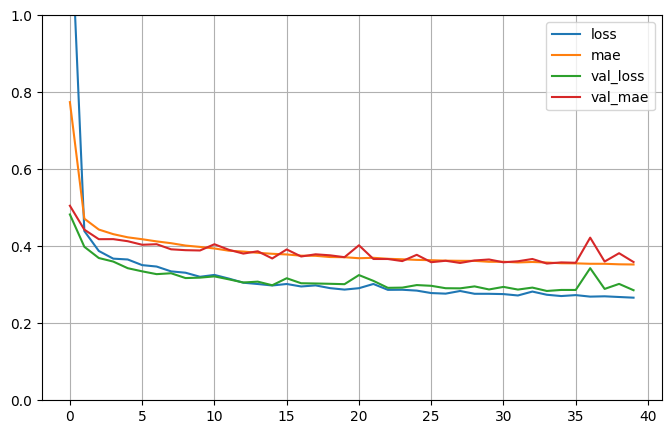

In [22]:
pd.DataFrame(ressults.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Tensorflow subclassing API

In [23]:
housing = fetch_california_housing()
all_x_train, x_test, all_y_train, y_test = train_test_split(housing.data, housing.target)


x_train, x_validation, y_train, y_validation = train_test_split(all_x_train, all_y_train)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)

In [37]:

class Exemple_SubclassingAPI(keras.models.Model):

    def __init__(self, nb_unit_1, nb_unit_2, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(nb_unit_1, activation=activation)
        self.hidden2 = keras.layers.Dense(nb_unit_2, activation=activation)
        self.res = keras.layers.Dense(1)


    def call(self, inputs):
        input = inputs
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        res = self.res(hidden2)
        return res

model = Exemple_SubclassingAPI(30,15)

In [27]:
model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

resssults = model.fit(x_train_scaled, y_train, epochs=40, validation_data=(x_validation_scaled, y_validation))

mse_test = model.evaluate(x_test_scaled, y_test)

Epoch 1/40
363/363 [==============================] - 2s 3ms/step - loss: 0.2794 - mae: 0.3631 - val_loss: 0.2949 - val_mae: 0.3804
Epoch 2/40
363/363 [==============================] - 1s 4ms/step - loss: 0.2802 - mae: 0.3619 - val_loss: 0.2879 - val_mae: 0.3621
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.2789 - mae: 0.3617 - val_loss: 0.2895 - val_mae: 0.3716
Epoch 4/40
363/363 [==============================] - 1s 4ms/step - loss: 0.2767 - mae: 0.3618 - val_loss: 0.2884 - val_mae: 0.3704
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2750 - mae: 0.3608 - val_loss: 0.2977 - val_mae: 0.3773
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2747 - mae: 0.3606 - val_loss: 0.2963 - val_mae: 0.3789
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2793 - mae: 0.3604 - val_loss: 0.2837 - val_mae: 0.3598
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

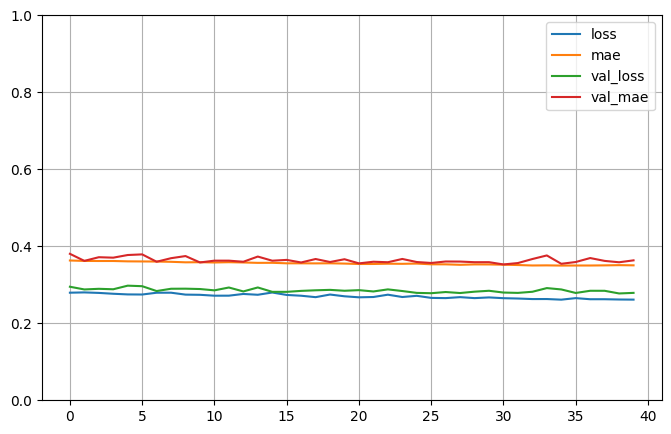

In [28]:
pd.DataFrame(resssults.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Let's use the sequential API for regression

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=x_train_scaled.shape[1:]))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1))



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                270       
                                                                 
 dense_11 (Dense)            (None, 15)                465       
                                                                 
 dense_12 (Dense)            (None, 8)                 128       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 872 (3.41 KB)
Trainable params: 872 (3.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])
ressults = model.fit(x_train_scaled, y_train, epochs=100, \
                     validation_data=(x_validation_scaled, y_validation))

mae_test = model.evaluate(x_test_scaled, y_test)

Epoch 1/100
363/363 [==============================] - 4s 8ms/step - loss: 1.4869 - mae: 0.7407 - val_loss: 0.4752 - val_mae: 0.5042
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4607 - mae: 0.4825 - val_loss: 0.4075 - val_mae: 0.4410
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4037 - mae: 0.4547 - val_loss: 0.3763 - val_mae: 0.4241
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3820 - mae: 0.4393 - val_loss: 0.3562 - val_mae: 0.4234
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - mae: 0.4293 - val_loss: 0.3478 - val_mae: 0.4255
Epoch 6/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3530 - mae: 0.4213 - val_loss: 0.3571 - val_mae: 0.4422
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3416 - mae: 0.4163 - val_loss: 0.3383 - val_mae: 0.4139
Epoch 8/100
363/363 [==============================] - 2s 4ms/step - 

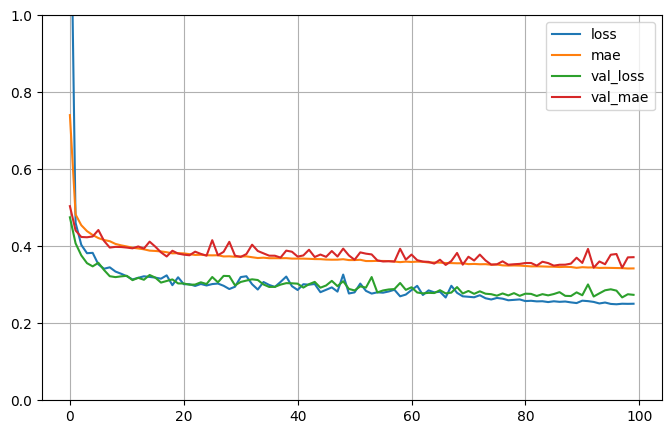

In [40]:
pd.DataFrame(ressults.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()